# Árvore de Decisão

* Uma **árvore de decisão** é uma representação de um conjunto de regras criado para tomar qualquer decisão, nesse caso, classificar um registro que envolva problemas de _classificação_ ou estimar um valor para problemas de _regressão_.

* Para cada problema da árvore, responde-se "Sim" ou "Não", guiando o modelo até a decisão final. Cada pergunta é chamada de **nó de decisão**, onde o primeiro é o **nó raíz** e a decisão é o **nó folha**.

* De maneira geral, a árvore de decisão é um decisão binária que tenta separar o dataset até conseguir uma **folha pura**, isto é, um nó que tenha apenas uma classe apenas.

<p align="center">
    <img src="download.png">
</p>

* Como exemplo, considere o dataset abaixo. Ele considera dois conjuntos de dados (eixo vertical e horizontal) com três diferentes **classes** que não são linearmente separavéis.
<p align="center">
    <img src="fig2.png">
</p>

* Cada traço de reta é uma **decisão** tomada.

### Como escolher?

* A maneira que a classificação é feita depende do **Ganho de Informação** (Information Gain), isto é, vamos considerar dois tipos distintos de classificação, $A$ e $B$, para um dataset. Assim, podemos atribuir o root node a esta classificação, gerando um "nó filho". O quanto de informação foi ganho pelas duas classificação?
    1. Entropia
        * Uma maneira é utilizar a medida de Entropia de Shannon:
        $$Entropy = -\sum_i p_i \log(p_i),$$
        onde $p_i$ é a probabilidade da classe $i$. Note que, o nó raiz possui entropia igual a 1, já que é o estado de maior desordem e com menos informação. Além disso, quanto mais perto a entropia está de 0, mais puro é o nó (pure node). Então é necessário calcular a entropia para cada nó e decidir baseado nesta medida qual será a classificação escolhida.

        Ganho de informação = $E(parent) - \sum_i w_i E(child_i)$, onde $w_i$ são os pesos da distribuição das classes em relação ao nó raiz. A divisão que possuir maior ganho de informação é a escolhida.

    2. Gini
        * Uma outra maneira é calcular o Gini, já que ele tem menor custo computacional em relação ao cáculo do $log$ na Entropia.
        $$G = 1 - \sum_i p_i^2,$$
        onde $p_i$ é a probabilidade da classe $i$. Assim, o ganho de informação é

        Ganho de informação = $G(parent) - \sum_i w_i G(child_i)$, onde $w_i$ são os pesos da distribuição das classes em relação ao nó raiz. A divisão que possuir maior ganho de informação é a escolhida.



* Para dataset utilizado no exemplo, temos:
<p align="center">
    <img src="fig3.png">
</p>

* X é o nosso dataset, sendo X[0] os dados no eixo horizontal e X[1] no eixo vertical. Aqui, são tomadas decisões iniciais baseadas em intervalos em relação a X[0];

* A árvore de decisão é uma representação de classificação, uma estrutura, mas somente ela não é considerado um Aprendizado de Máquina (ML). O que define ML é a escolha das regras de seleção para a criação da árvore:
    1. ID3
    2. C4.
    3. C5.0
    4. CART

- https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart
- O **scikit-learn**, segundo a própria documentação, usa uma **versão otimizada do CART (Classification and Regression Trees)**
    - De maneira geral, a seleção de nós é feita escolhendo qual recurso e limite vai tornar os **próximos passos** mais homogêneo possível.

- É um modelo que pode sofrer overfitting rapidamente.

### Árvore de Decisão por Classificação:

* Alvos categóricos para cada nó, prevendo a **classe majoritária** no nó pela distribuição de probabilidade, por exemplo;
* Ganho de informação baseado em **Entropia** ou **Gini**
* Métrica de validação do modelo: Acurácia

### Árvore de Decisão por Regressão:

* Alvo contínuo numérico, cada nó prevê a **a média dos valores** de $y$ naquele nó.
* Usa métricas de ganho de informação como Variance e escolhe o corte que minimiza este erro dentro do nó. Quanto maior o valor da variância, mais a impureza do nó.
$$Var = \frac{1}{N} \sum_{i=1}^N (y_i - \bar{y})^2$$
Aqui, $y_i$ é o target em teste e $\bar{y}$ é a média dos targets de treinamento no nó em análise. O ganho de informação para escolher qual divisão é melhor para o nó é considerar qual divisão possui a maior redução da variância em relação ao nó raiz:
$$Var Red = Var(parent) - \sum_i w_i Var(child_i),$$
onde $w_i$ são os pesos da distribuição das classes em relação ao nó raiz. A divisão que possuir tiver maior redução na Variância é a escolhida.
* Métrica de validação do modelo **Mean Squared Error**

- **Utilizando o dataset iris**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [50]:
import pandas as pd

In [51]:
from sklearn.datasets import load_iris

data = load_iris()

In [52]:
# Iniciando o DataFrame do dataset iris

iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target

iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [53]:
# Selecionando apenas as colunas de pétala e target
iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [54]:
# Filtro de target 0 e 1, relacionando apenas com duas dimensões

iris1 = iris.loc[iris.target.isin([0, 1]), ['petal length (cm)', 'petal width (cm)', 'target']]

In [67]:
# Separando x e y

x = iris1.drop('target', axis=1)
y = iris1.target

In [68]:
# Separando nossa base de dados em treino e teste utilizando o train_test_split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

* Podemos visualizar os dados de treino dessa base utilizando **matplotlib**

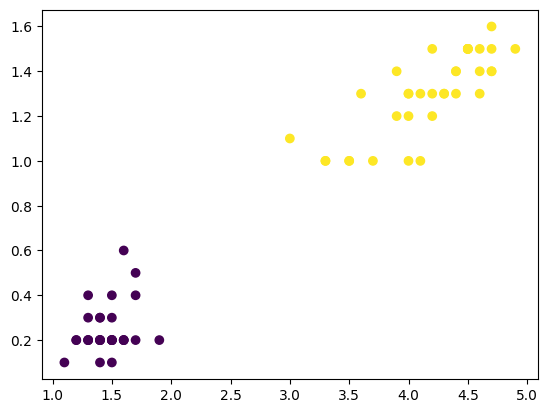

In [74]:
# Visualizando os dados de treino dessa base utilizando matplotlib

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c=y_train)


plt.show()

## Decision Tree Classification

In [70]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=42)

clf = clf.fit(x_train, y_train)

In [71]:
clf.score(x_train, y_train)

1.0

* Visualização da árvore

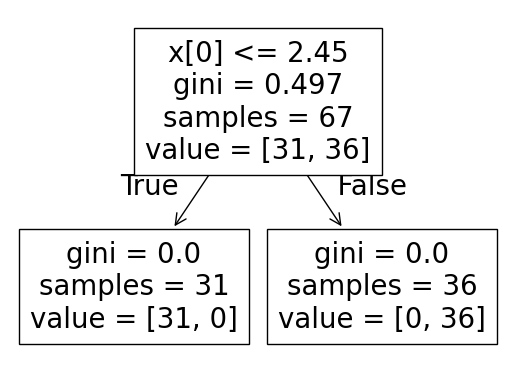

In [72]:
fig, ax = plt.subplots()

tree.plot_tree(clf)

plt.show()

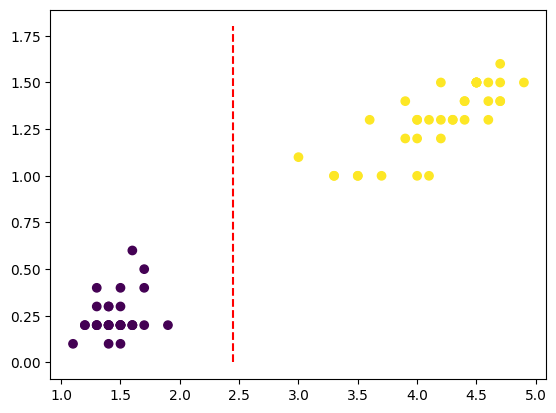

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x_train['petal length (cm)'], x_train['petal width (cm)'], c=y_train)

ax.plot([2.45, 2.45], [0, 1.8], '--r') # Primeira decisão da árvore

plt.show()

* Realizando o mesmo processo para o dataset de teste

In [79]:
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

1.0

* A acurácia é a métrica da árvore de decisão de classificação. Quanto mais próximo de 1, menos erro terá na previsão do nosso algoritmo de ML.

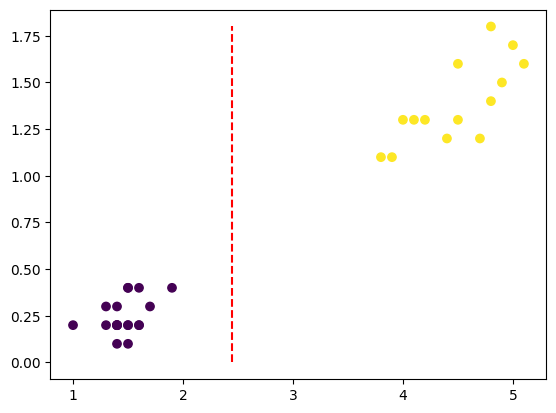

In [80]:
fig, ax = plt.subplots()

ax.scatter(x_test['petal length (cm)'], x_test['petal width (cm)'], c=y_test)

ax.plot([2.45, 2.45], [0, 1.8], '--r') # Primeira decisão da árvore

plt.show()

* Note que, o protocolo feito para a base de dados de treinamento funciona adequadamente para a base de dados de teste, ou seja, o modelo de ML está funcionando perfeitamente.

* Agora, podemos testar a mesma ideia para os tipos de pétalas 1 e 2

In [81]:
# Filtro de target 1 e 2, relacionando apenas com duas dimensões

iris2 = iris.loc[iris.target.isin([1, 2]), ['petal length (cm)', 'petal width (cm)', 'target']]

In [82]:
# Separando x e y

X = iris2.drop('target', axis=1)
Y = iris2.target

In [107]:
# Separando nossa base de dados em treino e teste utilizando o train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

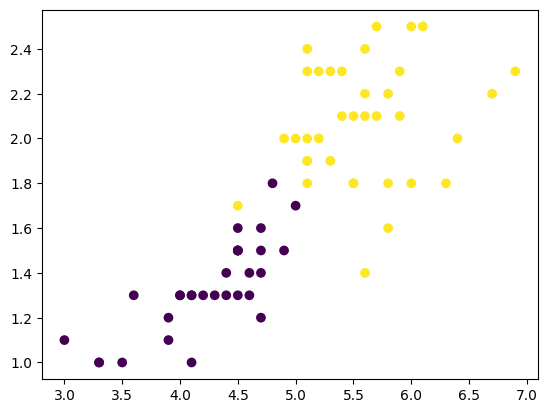

In [85]:
# Visualizando os dados de treino dessa base utilizando matplotlib

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=Y_train)


plt.show()

In [89]:
clf2 = tree.DecisionTreeClassifier(random_state=42)

clf2 = clf2.fit(X_train, Y_train)

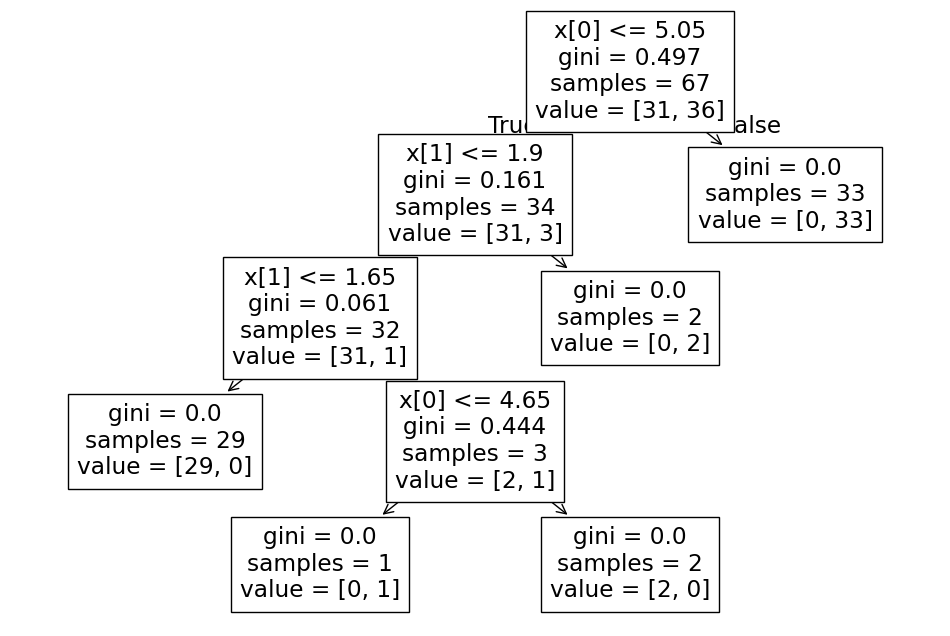

In [91]:
fig, ax = plt.subplots(figsize=(12,8))

tree.plot_tree(clf2)

plt.show()

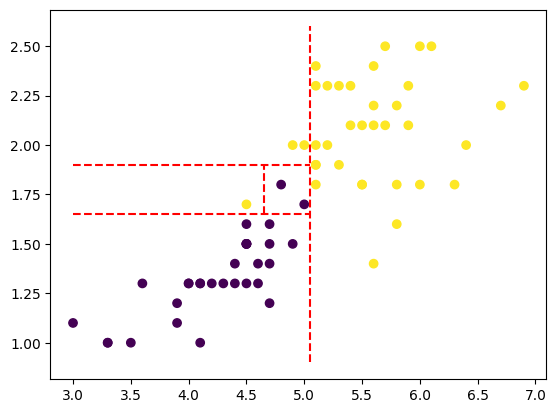

In [102]:
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=Y_train)

ax.plot([5.05, 5.05], [0.9, 2.6], '--r') # Primeira decisão da árvore
ax.plot([3, 5.05], [1.9, 1.9], '--r') # Segunda decisão da árvore
ax.plot([3, 5.05], [1.65, 1.65], '--r') # Terceira decisão da árvore
ax.plot([4.65, 4.65], [1.65, 1.9], '--r') # Quarta decisão da árvore


plt.show()

* Realizando o mesmo protocolo com os dados do tipo 1 e 2, mas para o dataset de teste

In [105]:
Y_pred = clf2.predict(X_test)

confusion_matrix(Y_test, Y_pred)

array([[18,  1],
       [ 6,  8]], dtype=int64)

* As células da diagonal secundária mostram que há mistura nas informações, isto é, não está alcançando um estado puro.

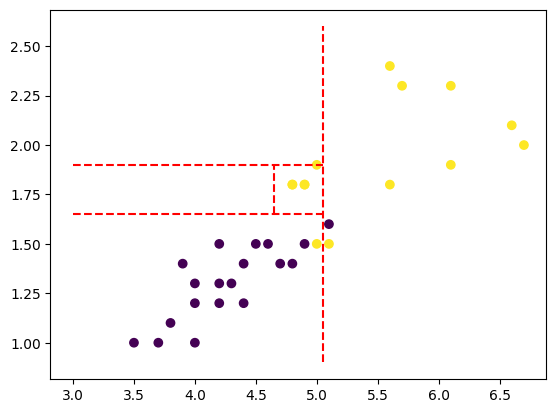

In [108]:
fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=Y_test)

ax.plot([5.05, 5.05], [0.9, 2.6], '--r') # Primeira decisão da árvore
ax.plot([3, 5.05], [1.9, 1.9], '--r') # Segunda decisão da árvore
ax.plot([3, 5.05], [1.65, 1.65], '--r') # Terceira decisão da árvore
ax.plot([4.65, 4.65], [1.65, 1.9], '--r') # Quarta decisão da árvore


plt.show()

* Nota-se que o modelo não está conseguindo separar os dados adequadamente, ele está errando, podemos tentar entender a partir dos dados de predição

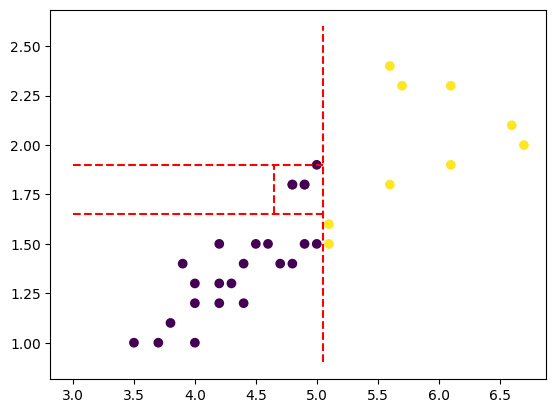

In [109]:
fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=Y_pred)

ax.plot([5.05, 5.05], [0.9, 2.6], '--r') # Primeira decisão da árvore
ax.plot([3, 5.05], [1.9, 1.9], '--r') # Segunda decisão da árvore
ax.plot([3, 5.05], [1.65, 1.65], '--r') # Terceira decisão da árvore
ax.plot([4.65, 4.65], [1.65, 1.9], '--r') # Quarta decisão da árvore


plt.show()

* Portanto, os critérios que consideramos para as tomadas de decisões das árvores não se encaixam perfeitamente aqui para este modelo com os tipos 1 e 2.

### Realizando para a base completa (tipos 1, 2 e 3)

In [110]:
x123 = iris.drop('target', axis=1)
y123 = iris.target

In [111]:
x123_train, x123_test, y123_train, y123_test = train_test_split(x123, y123, test_size=0.33, random_state=42)

In [113]:
clf123 = tree.DecisionTreeClassifier(random_state=42).fit(x123_train, y123_train)

In [114]:
clf123.score(x123_train, y123_train)

1.0

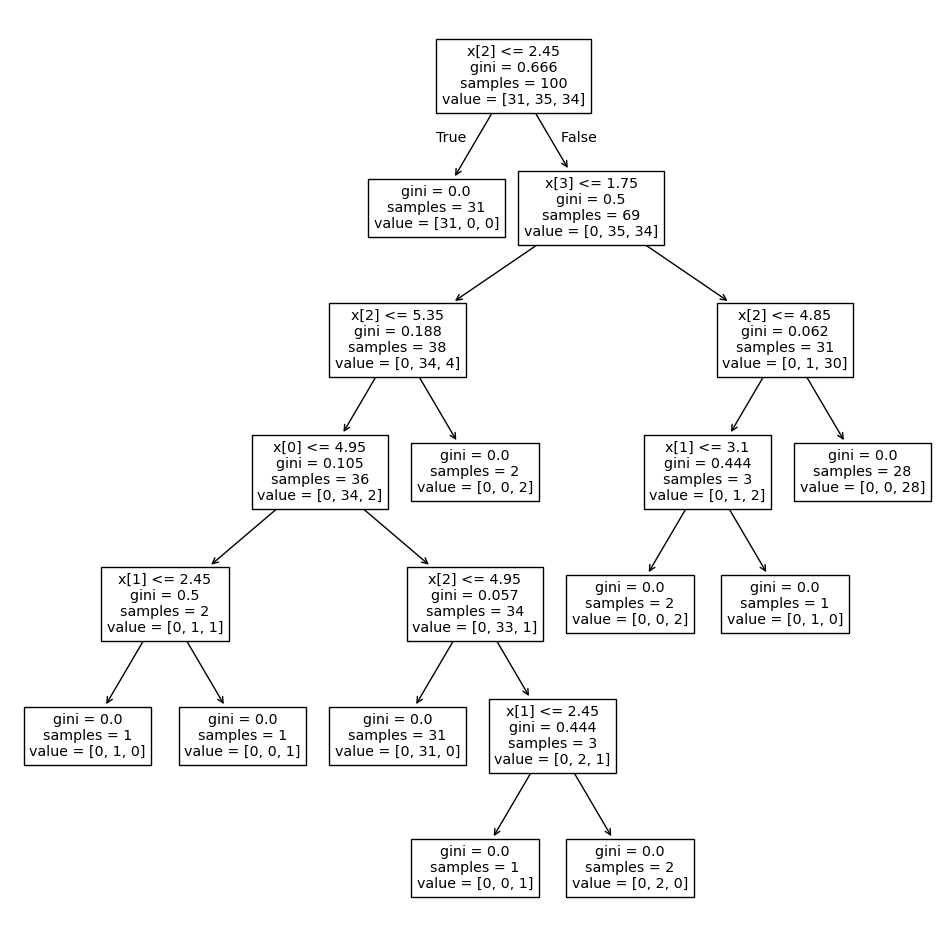

In [115]:
fix, ax = plt.subplots(figsize=(12,12))

tree.plot_tree(clf123)

plt.show()

In [116]:
y_pred123 = clf123.predict(x123_test)

confusion_matrix(y123_test, y_pred123)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

* O modelo se adequa muito bem, o número 1 em (2,1), significa que apenas 1 dado do tipo 2 foi classificado como tipo 1

In [117]:
accuracy_score(y123_test, y_pred123)

0.98